In [222]:
from diagrams import Diagram, Cluster, Edge
from diagrams.azure.general import Subscriptions as Subs
from diagrams.azure.general import Resourcegroups as rgs
from diagrams.azure.integration import LogicApps as lapps
from diagrams.azure.integration import LogicAppsCustomConnector as custconn
from diagrams.azure.integration import ServiceBus
from diagrams.azure.analytics import SynapseAnalytics as synapse
from diagrams.custom import Custom
from IPython.display import Image

print("Imports complete")

Imports complete


In [223]:
with Diagram("Logic App Architecture for Zendesk", show=False, direction="LR"):
    with Cluster("Resource Group - pins-rg-logic-app-odw-dev-uks"):

        zendesk = Custom("Zendesk", "../images/zendesk-logo.png")
        topic = ServiceBus("Topic")
        customconnector = custconn("Custom connector")
        synapse = synapse("Synapse Analytics")
        
        with Cluster("Logic Apps"):
            logicapps = [
                lapps("Created"),
                lapps("Updated")
            ]

        with Cluster("ServiceBus"):
            servicebus = [
                ServiceBus("new tickets"),
                ServiceBus("updated tickets")
            ]

        zendesk \
            >> Edge(label = "Zendesk API", color = "black", fontsize = "10") \
            >> customconnector \
            >> Edge(label = "data", color = "black", fontsize = "10") \
            >> logicapps \
            >> Edge(label = "Send message to topic with label", color = "darkgreen", fontsize = "10") \
            >> topic \
            >> Edge(label = "messages labelled 'created' or 'updated'", color = "darkgreen", fontsize = "10") \
            >> servicebus \
            >> Edge(label = "Messages ingested into Synapse raw layer", color = "firebrick", fontsize = "10") \
            >> synapse

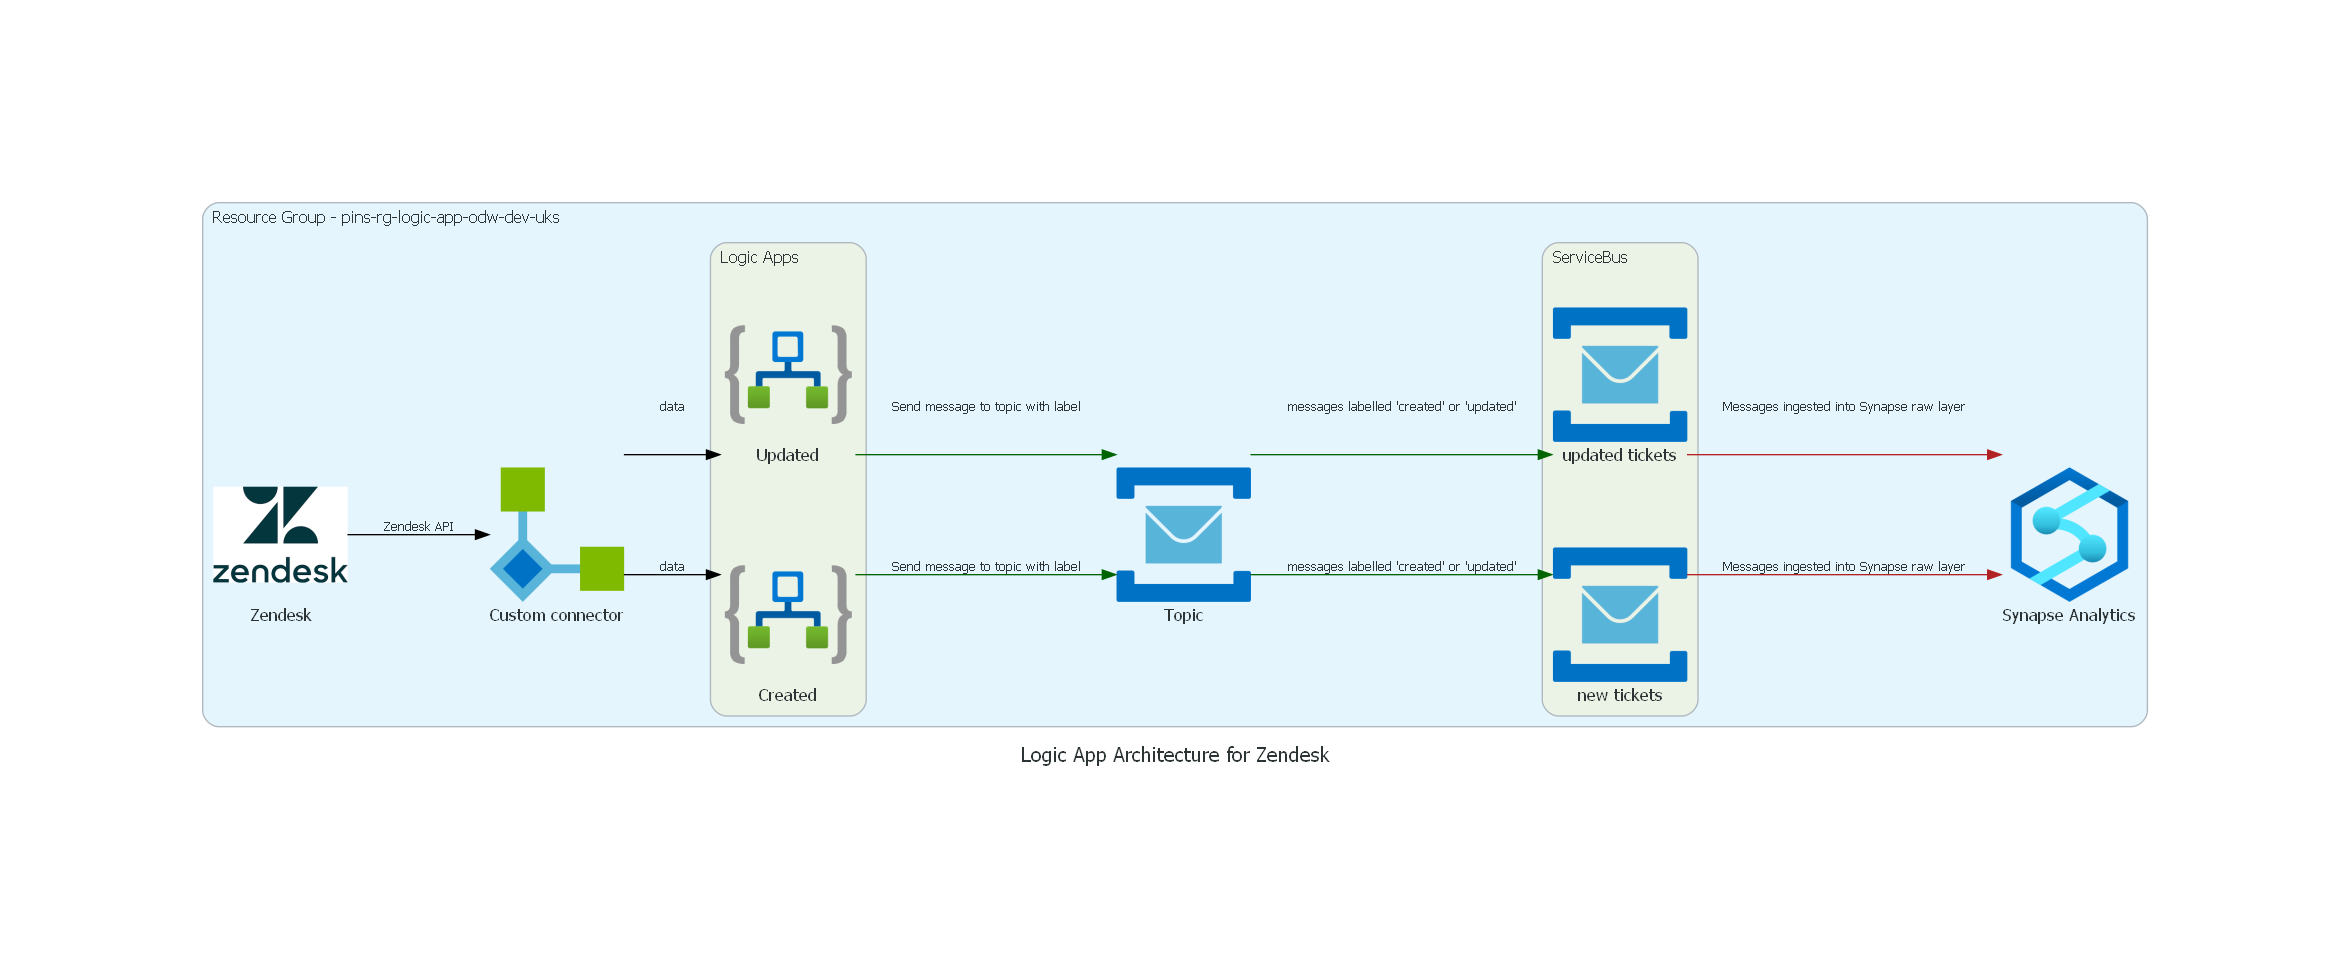

In [224]:
Image('./logic_app_architecture_for_zendesk.png')

In [225]:
%pwd

'c:\\Users\\ChrisTopping\\Git\\ODW-Service\\logicapp'